In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

In [2]:
from paretoset import paretoset
import pickle

In [8]:
import sys
sys.path.append('../')
from src import utils
from src import rb_specifications

sys.modules['utils'] = utils
sys.modules['rb_specifications'] =rb_specifications

PARETO SOLUTIONS OF A RANDOM SAMPLE SET

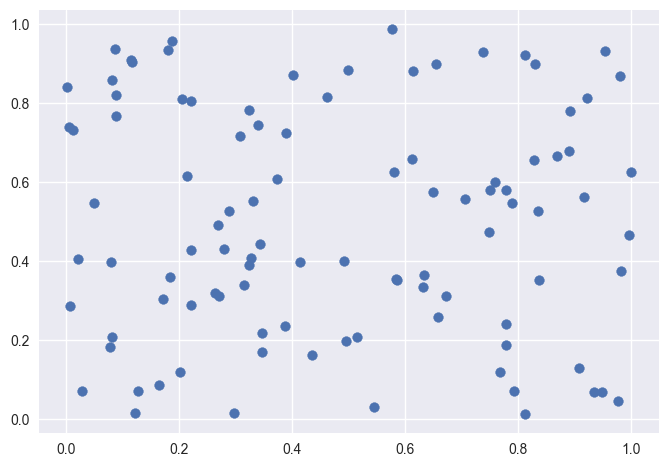

In [9]:
a = 0
b = 1
sample = (b-a) * np.random.random_sample((2,100)) + a
plt.scatter(x=sample[0], y=sample[1])
plt.show()

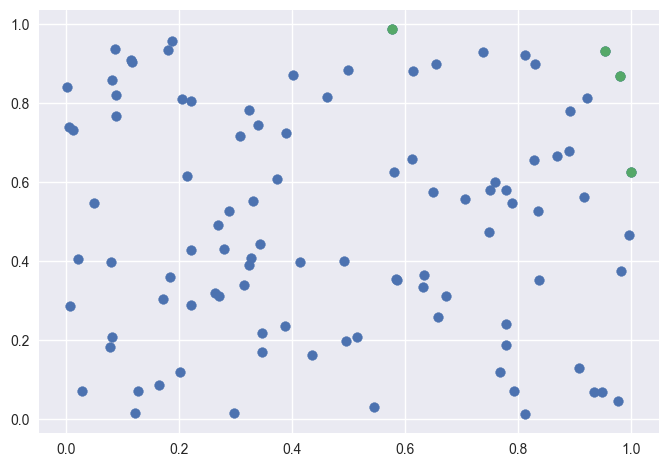

In [10]:
filter = paretoset(sample.T, sense=["max", "max"])

plt.scatter(x=sample[0], y=sample[1])
plt.scatter(x=sample[0][filter], y=sample[1][filter])
plt.show()

PROOF:

 A set associated with the maximum mean is in the pareto set. Assume that the maximum mean $\overline{x}_{max}$ is not part of the pareto optimal set, then there is to find an increment $\Delta x$, such that $\overline{x}_{\Delta} = \frac{(x+\Delta x) + y}{2}$ in the set; this is a contradiction, since it would imply $\overline{x}_{\Delta} > \overline{x}_{max}$.

PARETO SAMPLES IN TRAINING DATA 2x2

In [11]:
with open('../../surdata/Sur_square2_iter-30_objective-meanopt11-09-2023_16:45.pkl', 'rb') as file: 
    # Load the object from the file
    sur_loaded_data = pickle.load(file)
model = sur_loaded_data[0][0]
nnodes = len(model.y[0])

In [12]:
virtual_neighbours = pd.DataFrame(model.y)
virtual_neighbours.columns = [f'node {i}' for i in range(4)]
virtual_neighbours = virtual_neighbours[['node 0', 'node 1', 'node 2']]

In [13]:
virtual_neighbours

,node 0,node 1,node 2
0,1.555556,1.666667,1.444444
1,1.222222,1.111111,1.111111
2,2.111111,2.444444,2.555556
3,2.666667,2.555556,3.000000
4,1.333333,1.333333,1.666667
...,...,...,...
305,2.666667,2.888889,2.888889
306,2.888889,2.888889,2.888889
307,3.000000,3.000000,3.000000
308,3.000000,3.000000,3.000000


In [39]:
mask = paretoset(virtual_neighbours, sense=["max"]*3)

In [40]:
index_mean_max = np.argmax(np.mean(virtual_neighbours, axis=1))
virtual_neighbours['is pareto'] = mask
virtual_neighbours['is pareto'].iloc[index_mean_max] = 'True, max'

/var/folders/d5/3r233ss93fv98nxsrp4wy_hc0000gn/T/ipykernel_9846/1101954568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virtual_neighbours['is pareto'].iloc[index_mean_max] = 'True, max'


In [41]:
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
fig = px.scatter_3d(virtual_neighbours, x=virtual_neighbours.columns[0], y=virtual_neighbours.columns[1], z=virtual_neighbours.columns[2],
              color=virtual_neighbours.columns[-1])
fig.show()

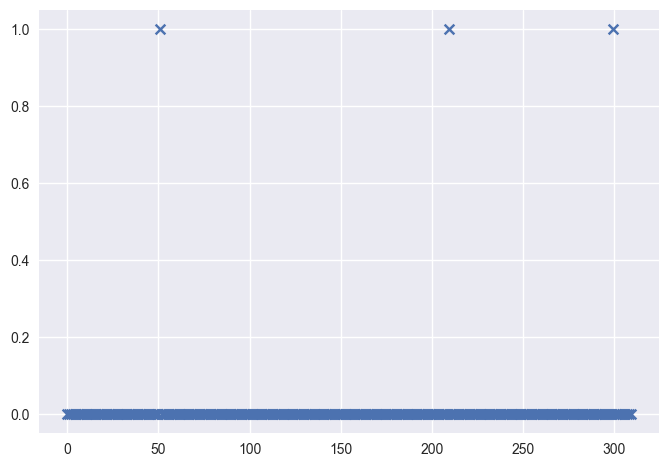

In [58]:
plt.scatter(x= range(len(mask)),y = mask, marker='x')


PARETO SAMPLES IN TRAINING DATA 2x3

In [59]:
with open('../surdata/Sur_tree23_iter-30_objective-meanopt11-07-2023_22:07.pkl', 'rb') as file: 
    # Load the object from the file
    sur_loaded_data = pickle.load(file)
model = sur_loaded_data[0][0]
nnodes = len(model.y[0])

In [60]:
virtual_neighbours = pd.DataFrame(model.y)
virtual_neighbours.columns = [f'node {i}' for i in range(nnodes)]
mask = paretoset(virtual_neighbours, sense=["max"]*nnodes)

Text(0.5, 1.0, '7-nodes topology: found set is pareto optimal')

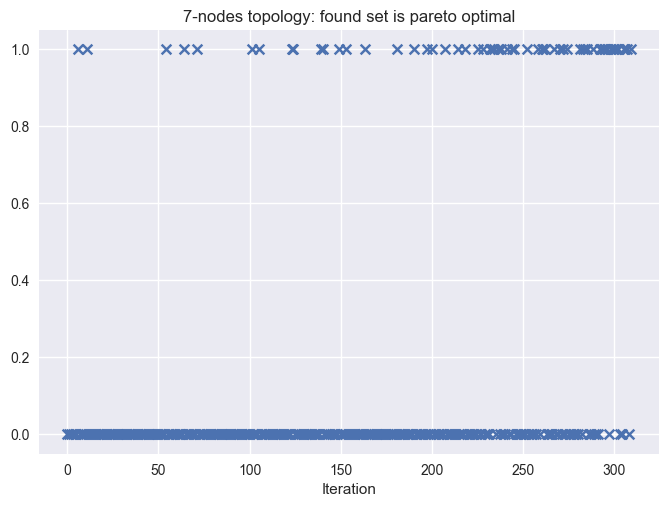

In [61]:
plt.scatter(x= range(len(mask)),y = mask, marker='x')
plt.xlabel("Iteration")
plt.title(f"{len(model.y[0])}-nodes topology: found set is pareto optimal")

In [62]:
pareto_set_X = sur_loaded_data[0][0].X_df[mask]
pareto_set_X

,M,qbits_per_channel,cutoff,q_swap,p_cons
6,7,44,6.506676,0.607545,0.033187
11,9,42,9.182305,0.715229,0.090564
54,7,47,9.614035,0.723037,0.050468
64,7,48,9.777165,0.724122,0.12014
71,8,49,9.647447,0.722913,0.057029
101,9,49,9.340494,0.622571,0.027544
105,8,49,8.085918,0.624946,0.024411
123,9,47,8.141569,0.610523,0.013282
124,9,49,9.874797,0.818187,0.022978
139,9,49,9.662584,0.682594,0.028897


<Figure size 800x550 with 0 Axes>

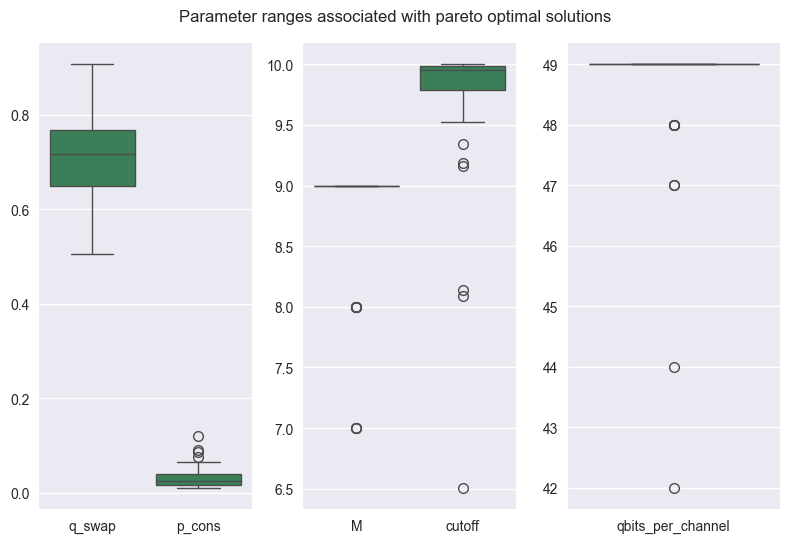

In [63]:
fig=plt.figure()
fig, axs = plt.subplots(1,3)
sns.boxplot(pareto_set_X[['q_swap','p_cons']], ax=axs[0], color='seagreen')
sns.boxplot(pareto_set_X[['M', 'cutoff']], ax=axs[1], color='seagreen')
sns.boxplot(pareto_set_X[['qbits_per_channel']],  ax=axs[2], color='seagreen')
plt.suptitle("Parameter ranges associated with pareto optimal solutions")
plt.tight_layout()
plt.show()